In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlalchemy
from sqlalchemy import create_engine, MetaData, func, desc
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Numeric, Text, Float
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

In [2]:
# Create an engine to a SQLite database file called `hawaii.sqlite`
engine = create_engine("sqlite:///hawaii.sqlite")

# Create a connection to the engine called `conn`
conn = engine.connect()

In [3]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [4]:
# Save a reference to the measurements table as `Measurement`
Measurement = Base.classes.measurements

# Save a reference to the stations table as `Station`
Station = Base.classes.stations

In [5]:
# Create a database session object
session = Session(engine)

# ### Precipitation Analysis

In [6]:
# Design a query to retrieve the last 12 months of precipitation data.
# Select only the `date` and `prcp` values.

#view the data
session.query(Measurement.date, Measurement.prcp).limit(10).all()

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', 0.16),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01)]

In [7]:
# Retrieve the data from 12 months before 8/23/2017 (assuming current date is 8/23/2017) 
prec_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()

# Load the query results into a Pandas DataFrame 
prec_df = pd.DataFrame(prec_data)

# Take average by date for the different stations
#prec_df = prec_df.groupby("date")["prcp"].mean()
#prec_df = prec_df.reset_index()

# Set the index to the date column.
prec_df.set_index('date', inplace = True)
prec_df.head()                                                                    

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [8]:
# another way to Load the query results into a Pandas DataFrame and set the index to the date column.
#prec_df2 = pd.read_sql_query("SELECT date, prcp FROM measurements WHERE date BETWEEN '2016-08-24' AND '2017-08024'", conn)
#prec_df2.set_index('date', inplace=True)
#prec_df2.head(100)

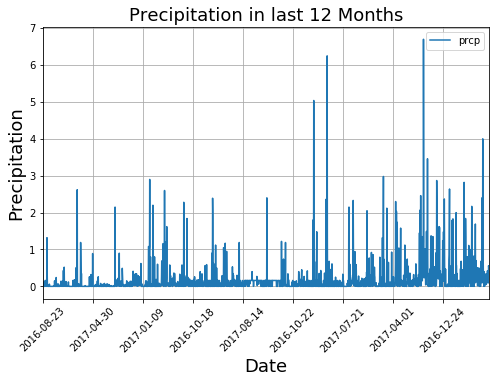

In [9]:
# Plot the results using the DataFrame `plot` method.

prec_df.plot(figsize=(8,5))
plt.tight_layout

plt.xticks(rotation="45")

plt.title("Precipitation in last 12 Months", fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Precipitation", fontsize=18)

plt.grid(color='darkgray')
plt.rcParams['axes.facecolor'] = 'lightgray'

plt.show()

In [10]:
# Use Pandas to print the summary statistics for the precipitation data.
prec_df.describe()

,prcp
count,2230.000000
mean,0.175659
std,0.439065
min,0.000000
25%,0.000000
50%,0.030000
75%,0.160000
max,6.700000


# ###Station Analysis


In [11]:
# Design a query to calculate the total number of stations.
session.query(func.count(Station.station)).all()

[(9)]

In [12]:
# Design a query to find the most active stations.
  # List the stations and observation counts in descending order
  # Which station has the highest number of observations?
active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station)
active_stations.order_by(desc(func.count(Measurement.tobs))).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).

#view the data
session.query(Measurement.date, Measurement.tobs).limit(10).all()

[('2010-01-01', 65.0),
 ('2010-01-02', 63.0),
 ('2010-01-03', 74.0),
 ('2010-01-04', 76.0),
 ('2010-01-06', 73.0),
 ('2010-01-07', 70.0),
 ('2010-01-08', 64.0),
 ('2010-01-09', 68.0),
 ('2010-01-10', 73.0),
 ('2010-01-11', 64.0)]

In [14]:
# Retrieve the data from 12 months before 8/23/2017 (assuming current date is 8/23/2017) 
tobs_data = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= '2016-08-23')\
.filter(Measurement.station == "USC00519281").all()

# Load the query results into a Pandas DataFrame 
tobs_df = pd.DataFrame(tobs_data)

# Set the index to the date column.
#tobs_df.set_index('date', inplace = True)
tobs_df.head()   


,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


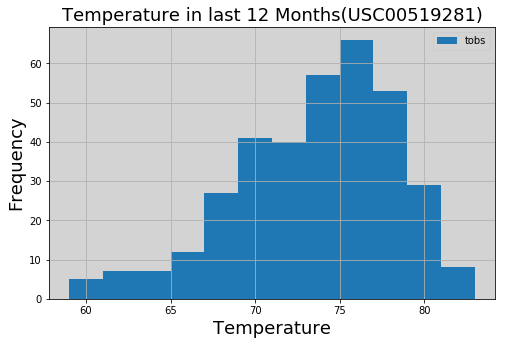

In [15]:
# Plot the results as a histogram with `bins=12`.

tobs_df.plot.hist(bins=12, figsize=(8,5))
plt.tight_layout

plt.title("Temperature in last 12 Months(USC00519281)", fontsize=18)
plt.xlabel('Temperature', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

plt.grid()
plt.rc('axes', axisbelow=True)

plt.show()

# ### Temperature Analysis

In [16]:
# Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` 
# and return the minimum, average, and maximum temperatures for that range of dates.

import datetime as datetime

# Define a function
def calc_temps(start_date, end_date):
        return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                    filter(Measurement.date >= start_date).\
                    filter(Measurement.date <= end_date).all()

# Call the function with user input values for Start date and End date
trip_temp_min, trip_temp_avg, trip_temp_max = calc_temps(str(input("Enter a Start Date (yyyy-mm-dd): ")), \
                                                         str(input("Enter an End Date (yyyy-mm-dd): ")))[0]
print(trip_temp_min, trip_temp_avg, trip_temp_max)
print("Minimum Temperature: {}".format(trip_temp_min))
print("Average Temperature: {}".format(trip_temp_avg))
print("Maximum Temperature: {}".format(trip_temp_max))          

Enter a Start Date (yyyy-mm-dd): 2017-03-03
Enter an End Date (yyyy-mm-dd): 2017-04-04
62.0 72.77722772277228 82.0
Minimum Temperature: 62.0
Average Temperature: 72.77722772277228
Maximum Temperature: 82.0


In [17]:
# Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the 
# matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

import datetime as datetime

# Get the Trip Start date from the user
start_year = input("Enter the Trip Start Date(yyyy): ")
start_month = input("Enter the Trip Start Date(mm): ")
start_day = input("Enter the Trip Start Date(dd): ")

# Get the Trip end date from the user
end_year = input("Enter the Trip End Date(yyyy): ")
end_month = input("Enter the TripEnd Date(mm): ")
end_day = input("Enter the Trip End Date(dd): ")

# Calculate the dates fro the previous year
prev_year_start_date = datetime.date(int(start_year), int(start_month), int(start_day)) - datetime.timedelta(days=365)
prev_year_end_date = datetime.date(int(end_year), int(end_month), int(end_day)) - datetime.timedelta(days=365)

print(prev_year_start_date)
print(f"Temperatures for the previous year from {prev_year_start_date} to {prev_year_end_date}")

# Call the function with the trip start and end dates from the previous year
prev_year_temp_min, prev_year_temp_avg, prev_year_temp_max = calc_temps(prev_year_start_date, prev_year_end_date)[0]

print("Previous year Minimum Temperature: {}".format(prev_year_temp_min))
print("Previous year Average Temperature: {}".format(prev_year_temp_avg))
print("Previous year Maximum Temperature: {}".format(prev_year_temp_max))

Enter the Trip Start Date(yyyy): 2017
Enter the Trip Start Date(mm): 01
Enter the Trip Start Date(dd): 01
Enter the Trip End Date(yyyy): 2017
Enter the TripEnd Date(mm): 04
Enter the Trip End Date(dd): 04
2016-01-02
Temperatures for the previous year from 2016-01-02 to 2016-04-04
Previous year Minimum Temperature: 56.0
Previous year Average Temperature: 70.19420783645656
Previous year Maximum Temperature: 82.0


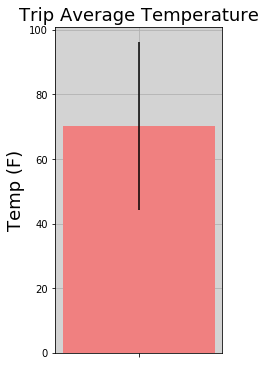

In [18]:
# Plot the min, avg, and max temperature from your previous query as a bar chart.
  # Use the average temperature as the bar height.
  # Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).
#<center><img src='images/temp_avg.png' height="400px"/></center>

plt.figure(figsize=(3,6))

yerr= prev_year_temp_max - prev_year_temp_min
plt.bar("", prev_year_temp_avg, yerr=yerr, color="lightcoral")

plt.title("Trip Average Temperature", fontsize=18)
plt.xlabel('', fontsize=18)
plt.ylabel('Temp (F)', fontsize=18)

plt.grid()

plt.show()

# ### Optional Recommended Analysis

In [19]:
# Calcualte the rainfall per weather station using the previous year's matching dates.
rainfall_per_station = session.query(Measurement.station, func.sum(Measurement.prcp)).\
                            group_by(Measurement.station).\
                            filter(Measurement.date >= prev_year_start_date).\
                            filter(Measurement.date <= prev_year_end_date).all()
rainfall_per_station

[('USC00513117', 8.789999999999996),
 ('USC00514830', 6.079999999999999),
 ('USC00516128', 9.03),
 ('USC00517948', 6.720000000000003),
 ('USC00519281', 6.7399999999999975),
 ('USC00519397', 1.3800000000000003),
 ('USC00519523', 5.11)]